# Remarques:

Le notebook ne runnait pas quand j'ai pull
C'est pratique si chacun peut 'Restart the Kernel' avant de push comme ca le code compile pour ceux d'après

# TODO LIST:

quick summary of what is said about the data on SNAP


# Data loading & cleaning

#### Imports

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

#### Dataset description

#TODO: quick summary of what is said about the data on SNAP


#### Features description

   E: election outcome, succesful (1) or not (0)
   
   T: time election was closed
   
   U: candidate id, the one being considered for promotion
   
   N: nominator id
   
   V: we have 3 interesting features in this line
   
      result of the vote (1:support, 0:neutral, -1:oppose)
      
      voter id
      
      time of the vote (yyyy-mm-dd)


#### Data loading

In [3]:
DATA_PATH = "data/"

# create a variable to store all the features
wiki = []

# we use encoding="latin-1" as some user names contain non utf-8 characters
# note that we are not interested in the user names, so we don't care if their names is not properly read
with open(DATA_PATH+"wikiElec.ElecBs3.txt", encoding="latin-1") as f:
    
    # lines of the files
    for line in f.readlines():
        
        # lines are separated with tab: \t
        line = line.split("\t")
        first = line[0]
            
        # election outcome
        if first=="E":
            elec_outcome = line[1][:-1] #[:-1] to remove the \n
            continue
        
        # time the election was closed
        if first=="T":
            elec_time = pd.to_datetime(line[1])
            continue
            
        # candidate id  
        if first=="U":
            candidate_id = line[1]
            continue 
            
        # nominator id
        if first=="N":
            nominator_id = line[1]
            continue
        
        if first=="V":
            vote = line[1]
            voter_id = line[2]
            vote_time = pd.to_datetime(line[3])
            
            #store the results
            wiki.append([elec_outcome, elec_time, candidate_id, voter_id, vote, vote_time, nominator_id])
            continue

In [4]:
# store the result wiki in an appropriate pandas dataframe
wikipedia = pd.DataFrame(wiki, columns = ["elec_outcome", "elec_time", "candidate_id", "voter_id", "vote", "vote_time", "nominator_id"])
wikipedia.head()

,elec_outcome,elec_time,candidate_id,voter_id,vote,vote_time,nominator_id
0,1,2004-09-21 01:15:53,30,3,1,2004-09-14 16:26:00,32
1,1,2004-09-21 01:15:53,30,25,-1,2004-09-14 16:53:00,32
2,1,2004-09-21 01:15:53,30,4,1,2004-09-14 17:08:00,32
3,1,2004-09-21 01:15:53,30,5,1,2004-09-14 17:37:00,32
4,1,2004-09-21 01:15:53,30,6,1,2004-09-14 19:28:00,32


#### Data cleaning

We would not want to begin our analysis using inexisting dates ! Let us check that all dates present in our dataframe are coherent. 

Let's check extreme dates.

In [5]:
print("The last election was closed on", max(wikipedia.elec_time),"\nThe first election was closed on", min(wikipedia.elec_time))
print("The last vote was casted on", max(wikipedia.vote_time),"\nThe first vote was casted on", min(wikipedia.vote_time))

The last election was closed on 2008-01-06 02:18:28 
The first election was closed on 2004-09-17 00:41:00
The last vote was casted on 2105-08-31 10:32:44 
The first vote was casted on 2004-03-28 19:12:00


The dataset is defined on the SNAP website as containing elections & votes until January 2008. 

The time elections were closed seem to be coherent. 
In contrast, there are clearly wrong dates about the time of the votes (we're not in 2105 yet...)

In [6]:
# Let's check how many votes were registered after Jan 2008. 
wikipedia[(wikipedia.vote_time >= '2008-02-01')]

,elec_outcome,elec_time,candidate_id,voter_id,vote,vote_time,nominator_id
1143,0,2006-12-29 16:13:03,300,92,1,2086-05-13 01:04:00,-1
1214,0,2007-09-10 02:08:15,302,92,1,2096-05-13 01:04:00,-1
64807,0,2006-11-07 23:12:34,5045,4963,0,2061-11-17 01:04:00,-1
65201,1,2007-05-04 01:47:24,3537,4963,1,2067-11-21 01:04:00,1137
65654,1,2007-05-04 02:02:48,5092,4963,1,2063-01-22 01:04:00,4476
66494,1,2007-05-04 02:46:43,5144,4963,1,2070-12-02 01:04:00,3453
66593,1,2007-05-04 02:56:08,4547,4963,1,2074-11-29 01:04:00,5058
67665,1,2007-05-04 03:31:09,3691,4963,1,2065-09-17 01:04:00,3691
67856,0,2007-12-10 10:57:36,3455,4963,1,2064-05-21 01:04:00,-1
68512,0,2007-05-04 03:57:13,4468,4963,0,2061-07-28 01:04:00,-1


We will thus consider all votes that are registered after Jan 2008 as parasite and delete them from our dataset.

In [7]:
# Let's clean it up
wikipedia = wikipedia[(wikipedia.vote_time < '2008-02-01')]

In [8]:
# The site is not precise as when exactly in January the votes stopped to be casted. 
# Let's also investigate that in order to get a precise idea of the timelapse we are working on.
wikipedia.vote_time.sort_values(ascending=False)

114017   2008-01-06 02:16:00
114016   2008-01-06 02:10:00
113850   2008-01-06 02:04:00
114015   2008-01-06 01:53:00
113904   2008-01-06 01:12:00
                 ...        
2326     2004-03-28 19:55:00
2325     2004-03-28 19:25:00
2324     2004-03-28 19:22:00
2323     2004-03-28 19:19:00
2322     2004-03-28 19:12:00
Name: vote_time, Length: 114029, dtype: datetime64[ns]

In our dataset, the last votes were casted on January 6th, 2008. 

# Preparing datasets for subsequent analysis  

## Sign_time

In a first part, we will only need to study the sign of the votes (i.e. the vote outcome) and their date (i.e. vote_time). We do not need the ids of the voters or candidatate or nominators. Let's create an appropriate dataset for this case. 

In [9]:
sign_time = wikipedia[['vote','vote_time']]

In [10]:
print(sign_time.shape)
sign_time.head()

(114029, 2)


,vote,vote_time
0,1,2004-09-14 16:26:00
1,-1,2004-09-14 16:53:00
2,1,2004-09-14 17:08:00
3,1,2004-09-14 17:37:00
4,1,2004-09-14 19:28:00


## Neutral or not

What role do neutral votes play in this temporal analysis?
We will need a dataframe with neutral votes and the same one without them 


In [11]:
wikipedia_neutral = wikipedia
wikipedia_signed = wikipedia[wikipedia.vote != 0]

# Temporal analysis

## DATE (yyyy-mm-dd)

We will try to detect any election-related patterns based on the moment that the elections were held. 

We will consider the following election-related outcomes:
1. number of elections
2. fraction of successful elections
3. number of votes
4. fractions of positive votes

The x-axis will be the time at which the election was closed.

We will use mainly visualizations under the form of graphs.

In [12]:
#TODO : adapt the code below
#not done yet

### By month

In [13]:
# sum of the votes
"""sign_sum = sign_time.groupby(pd.Grouper(key="Time", freq="M")).sum()
print(sign_sum.tail())

fig = plt.figure(figsize=(12,6))
plt.plot(sign_sum)
plt.xlabel('Months')
plt.ylabel('Sum of the votes')
plt.title('Sum of the votes by months - from 2004-09-30 to 2008-01-31');

# Interpretation:
# majority of the votes are postive""" 

'sign_sum = sign_time.groupby(pd.Grouper(key="Time", freq="M")).sum()\nprint(sign_sum.tail())\n\nfig = plt.figure(figsize=(12,6))\nplt.plot(sign_sum)\nplt.xlabel(\'Months\')\nplt.ylabel(\'Sum of the votes\')\nplt.title(\'Sum of the votes by months - from 2004-09-30 to 2008-01-31\');\n\n# Interpretation:\n# majority of the votes are postive'

In [14]:
# avg of the votes
"""sign_avg = sign_time.groupby(pd.Grouper(key="Time", freq="M")).mean()
print(sign_avg.tail())

fig = plt.figure(figsize=(12,6))
plt.plot(sign_avg)
plt.xlabel('Months')
plt.ylabel('Avg of the votes')
plt.title('Avg of the votes by months - from 2004-09-30 to 2008-01-31');

# Interpretation: large drop in positive vote in Jan 2007
# Some pattern?"""

'sign_avg = sign_time.groupby(pd.Grouper(key="Time", freq="M")).mean()\nprint(sign_avg.tail())\n\nfig = plt.figure(figsize=(12,6))\nplt.plot(sign_avg)\nplt.xlabel(\'Months\')\nplt.ylabel(\'Avg of the votes\')\nplt.title(\'Avg of the votes by months - from 2004-09-30 to 2008-01-31\');\n\n# Interpretation: large drop in positive vote in Jan 2007\n# Some pattern?'

### By week

In [15]:
# avg of the votes
"""sign_avg_w = sign_time.groupby(pd.Grouper(key="Time", freq="W")).mean()
print(sign_avg_w.tail())

fig = plt.figure(figsize=(16,6))
plt.plot(sign_avg_w)
plt.xlabel('Months')
plt.ylabel('Avg of the votes')
plt.title('Avg of the votes by weeks - from 2004-09-30 to 2008-01-31');

# Interpretation: looks like there is a kind of recurrent pattern """

'sign_avg_w = sign_time.groupby(pd.Grouper(key="Time", freq="W")).mean()\nprint(sign_avg_w.tail())\n\nfig = plt.figure(figsize=(16,6))\nplt.plot(sign_avg_w)\nplt.xlabel(\'Months\')\nplt.ylabel(\'Avg of the votes\')\nplt.title(\'Avg of the votes by weeks - from 2004-09-30 to 2008-01-31\');\n\n# Interpretation: looks like there is a kind of recurrent pattern '

In [16]:
# subsample: focus on the left part of the graph
"""sample = wikipedia[(wikipedia.Time >= '2004-09-14') & (wikipedia.Time <= '2005-09-14')]
sample = sample[['Sign','Time']]

sign_avg_w = sample.groupby(pd.Grouper(key="Time", freq="W")).mean()

fig = plt.figure(figsize=(19,6))
plt.plot(sign_avg_w)
plt.xlabel('Month')
plt.ylabel('Avg of the votes')
plt.title('Avg of the votes by weeks - from 2004-09-14 to 2005-09-14');

# seems like people are less postive at the end of the month ??
# looks like the priod is around 40 days... weird"""

'sample = wikipedia[(wikipedia.Time >= \'2004-09-14\') & (wikipedia.Time <= \'2005-09-14\')]\nsample = sample[[\'Sign\',\'Time\']]\n\nsign_avg_w = sample.groupby(pd.Grouper(key="Time", freq="W")).mean()\n\nfig = plt.figure(figsize=(19,6))\nplt.plot(sign_avg_w)\nplt.xlabel(\'Month\')\nplt.ylabel(\'Avg of the votes\')\nplt.title(\'Avg of the votes by weeks - from 2004-09-14 to 2005-09-14\');\n\n# seems like people are less postive at the end of the month ??\n# looks like the priod is around 40 days... weird'

In [17]:
# subsample: focus on the right part of the graph
"""sample = wikipedia[(wikipedia.Time >= '2007-01-01') & (wikipedia.Time <= '2008-01-01')]
sample = sample[['Sign','Time']]

sign_avg_w = sample.groupby(pd.Grouper(key="Time", freq="W")).mean()

fig = plt.figure(figsize=(19,6))
plt.plot(sign_avg_w)
plt.xlabel('Month')
plt.ylabel('Avg of the votes')
plt.title('Avg of the votes by weeks - from 2007-01-01 to 2008-01-01');

# seems like people are less postive at the end of the month ??
# looks like the priod is around 40 days... weird """

'sample = wikipedia[(wikipedia.Time >= \'2007-01-01\') & (wikipedia.Time <= \'2008-01-01\')]\nsample = sample[[\'Sign\',\'Time\']]\n\nsign_avg_w = sample.groupby(pd.Grouper(key="Time", freq="W")).mean()\n\nfig = plt.figure(figsize=(19,6))\nplt.plot(sign_avg_w)\nplt.xlabel(\'Month\')\nplt.ylabel(\'Avg of the votes\')\nplt.title(\'Avg of the votes by weeks - from 2007-01-01 to 2008-01-01\');\n\n# seems like people are less postive at the end of the month ??\n# looks like the priod is around 40 days... weird '

#### Average number of votes

Taking the average number of votes and looking at its evolution over time allows us to compare how the average vote evolved over time without experiencing a distortion over time due to the unequal number of votes for the different time instants. 

In [52]:
#make sure the 'vote' is of type int (needed for further calculations)
sign_time = wikipedia[['vote','vote_time']].copy()
sign_time["vote"] = sign_time["vote"].apply(lambda x : int(x))
sign_time.head()

,vote,vote_time
0,1,2004-09-14 16:26:00
1,-1,2004-09-14 16:53:00
2,1,2004-09-14 17:08:00
3,1,2004-09-14 17:37:00
4,1,2004-09-14 19:28:00


Overall average of vote:  0.534


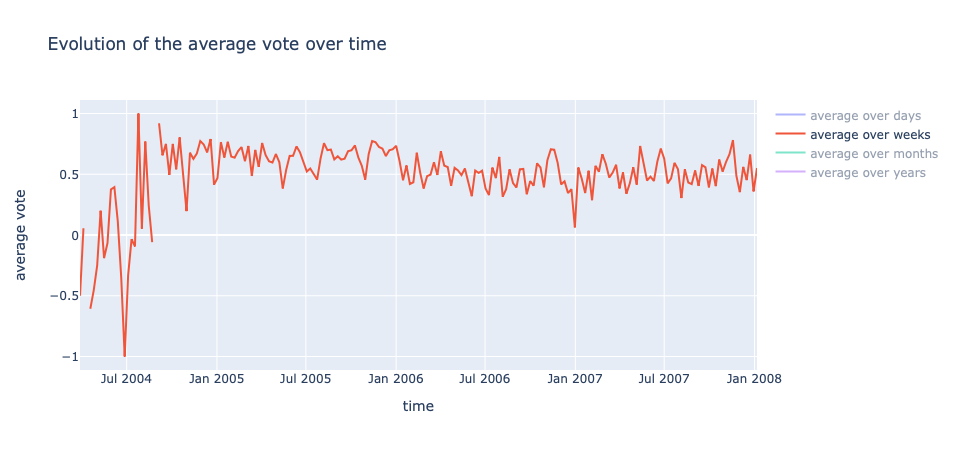

In [55]:
import plotly.graph_objects as go
#overall average
sign_avg = sign_time['vote'].mean()
print("Overall average of vote: ", "{:.3f}".format(sign_avg))

#average over days, weeks, months and years
sign_avg_day = sign_time.groupby(pd.Grouper(key="vote_time", freq="D")).mean()
sign_avg_day['count'] = sign_time.groupby(pd.Grouper(key="vote_time", freq="D")).count()
sign_avg_week = sign_time.groupby(pd.Grouper(key="vote_time", freq="W")).mean()
sign_avg_week['count'] = sign_time.groupby(pd.Grouper(key="vote_time", freq="W")).count()
sign_avg_month = sign_time.groupby(pd.Grouper(key="vote_time", freq="M")).mean()
sign_avg_month['count'] = sign_time.groupby(pd.Grouper(key="vote_time", freq="M")).count()
sign_avg_year = sign_time.groupby(pd.Grouper(key="vote_time", freq="Y")).mean()
sign_avg_year['count'] = sign_time.groupby(pd.Grouper(key="vote_time", freq="Y")).count()

fig = go.Figure()

def plot_trace(x,y):
    fig.add_trace(go.Scatter(
        x= x,
        y= y,
        mode="lines",
        name="average over days", #to modularize
        visible = 'legendonly',
        hovertemplate =
        '<br><b>Date </b>: %{x}'+
        '<br><b>Average vote </b>: %{y:.2f}'
    ))

plot_trace(sign_avg_day.index,sign_avg_day['vote'])

fig.add_trace(go.Scatter(
    x= sign_avg_week.index,
    y= sign_avg_week['vote'],
    mode="lines",
    name="average over weeks",
    #opacity=0.2
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x= sign_avg_month.index,
    y= sign_avg_month['vote'],
    mode="lines",
    name="average over months",
        visible = 'legendonly',
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'
))

fig.add_trace(go.Scatter(
    x= sign_avg_year.index,
    y= sign_avg_year['vote'],
    mode="lines",
    name="average over years",
    visible = 'legendonly',
    #opacity=0.2
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'
))

fig.update_layout(
    title="Evolution of the average vote over time",
    xaxis_title="time",
    yaxis_title="average vote")
fig.show()

fig.write_html("../wikipedia/_includes/average_over_time.html")

As we have an average of 0.534, it seems that we have an overall tendency for positive votes. Indeed, having an equal amount of positive and negative votes would mean that we would get an average vote of 0.

Feel free to investigate this graph by activating the traces for averaging over different time ranges and/or by zooming in! A few things on this visualization immediately caught our attention. First of all, considering the averaging over years, we only have 4 values of course as all voting dates occurred between 2004 and 2008. It is important to note that especially the value obtained for the year '2008' does not represent much as our dataset only has values for the first 6 days of that year. The value obtained for '2008' has thus been calculated from 6 days only. 

Secondly, by taking a closer look at the averaging over the weeks, we can see that data is missing for two 2-week periods, namely between April 4th and April 18th 2004 as well as between August 22nd and September 5th 2004.

Last but not least, the average vote is very low considering values from the beginning on the vote recording, i.e. March 2004, until around October of the same year. Does this mean that people were overall 'meaner' and thus preferentially voting against people in the beginning of 2004? Let's not jump to conclusions! It might be better to first check for outliers and see if we have a skewed distribution of votes, so let's do this as next step!

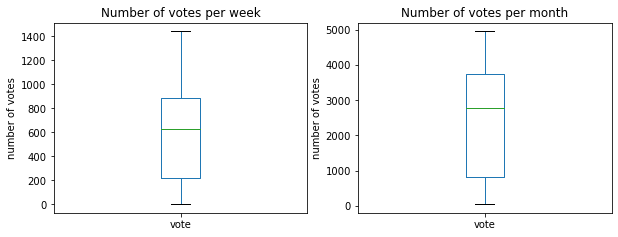

In [20]:
#Analyze distribution of the number of votes
count_per_week=sign_time.groupby(pd.Grouper(key="vote_time", freq="W")).count()
count_per_month=sign_time.groupby(pd.Grouper(key="vote_time", freq="M")).count()

#plt.figure(1, figsize = (7,3.5))
fig , (ax1, ax2) = plt.subplots(1,2, figsize = (10,3.5))
count_per_week.boxplot(grid=False, ax=ax1)
count_per_month.boxplot(grid=False, ax=ax2) 
ax1.set_ylabel('number of votes')
ax1.set_title('Number of votes per week')
ax2.set_ylabel('number of votes')
ax2.set_title('Number of votes per month')

plt.show()

This figures show us that we have no outliers, neat. We can however already see that the distribution is clearly skewed. 

/Users/camille/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/camille/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



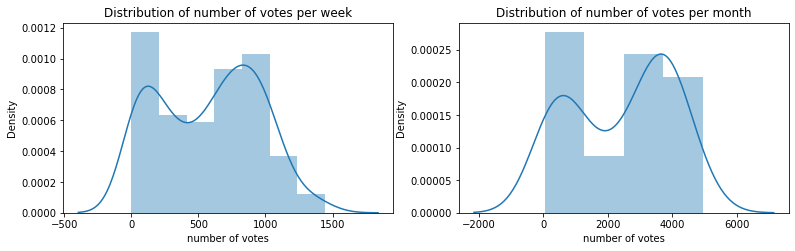

In [27]:
import seaborn as sns
count_per_week

fig , (ax1, ax2) = plt.subplots(1,2, figsize = (13,3.5))
sns.distplot(count_per_week, hist=True, label='per week', ax=ax1)
sns.distplot(count_per_month, hist=True, label='per month', ax=ax2)
ax1.set_xlabel('number of votes')
ax1.set_title('Distribution of number of votes per week')
ax2.set_xlabel('number of votes')
ax2.set_title('Distribution of number of votes per month')

plt.show()
#WHAT DO WE GET FROM THIS? :/ could interpret as 2 sep pattern of counts (double peak distribution)

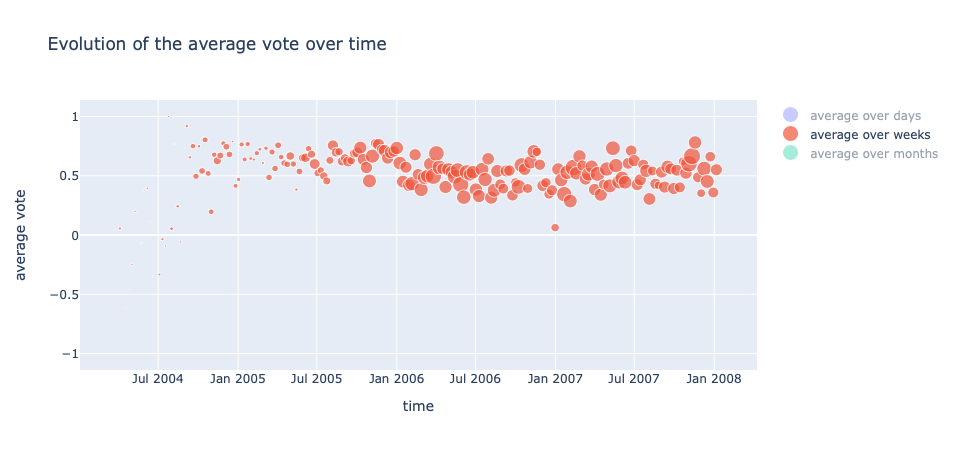

In [37]:
#import plotly.express as px
fig = go.Figure()

fig.add_trace(go.Scatter(
    x= sign_avg_day.index,
    y= sign_avg_day['vote'],
    name="average over days",
    marker_size=sign_avg_day['count'],
    visible = 'legendonly',
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'+
    '<br><b>Number of votes </b>: %{marker_size}<br>'
))


fig.add_trace(go.Scatter(
    x= sign_avg_week.index,
    y= sign_avg_week['vote'],
    name="average over weeks",
    marker_size=sign_avg_week['count'],
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'+
    '<br><b>Number of votes </b>: %{marker_size}<br>'
))


fig.add_trace(go.Scatter(
    x= sign_avg_month.index,
    y= sign_avg_month['vote'],
    name="average over months",
    marker_size=sign_avg_month['count'],
    visible = 'legendonly',
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'+
    '<br><b>Number of votes </b>: %{marker_size}<br>'
))


fig.update_layout(
    title="Evolution of the average vote over time",
    xaxis_title="time",
    yaxis_title="average vote")

fig.update_traces(
    mode='markers',
    marker={'sizemode':'area',
            'sizeref':10})
fig.show()

Focusing on the week range, we can now easily see that until around July 2005, we only have a quite low number of votes (smaller bubbles) compared to the number of votes from July 2005 until January 2008 (bigger bubbles). Interesting! It seems that over time more and more people started voted in Wikipedia elections. However, we unfortunately do not have the total number of wikipedia admins because most likely this number also increased over time in the same fashion than the number of votes. Circling back to our previous comment, we can thus see that especially before October 2004, only very few people voted during adminship elections. XXcomment? maybe interesting for herding behaviour as we see that as we have far less votes they are way more negative! 

We are sure you did not miss out on the little bubble that does not follow the overall trend in January 2007. Indeed, this bubble corresponds to the number of votes that was recorded the week ending with December the 31st 2006. The small size of this bubble does not surprise, one could expect that during the holiday season less people vote on elections (even though we did not investigate this trend for the other years), XXThey might also be a lower number of elections? interesting to look into?. What is more interesting however, is that the average vote is significantly(XXwould need to do a test for that) for that week. XXback to comment before! 

https://en.wikipedia.org/wiki/Special:ListUsers?username=&group=sysop&wpsubmit=&wpFormIdentifier=mw-listusers-form&limit=50 (list of all wikipedia admins, maybe interesting to cite or put as hyperlink onto website)

#### Average number of positive vs negative votes

Let's now more specifically take a look at the average number of positive and negative votes. 

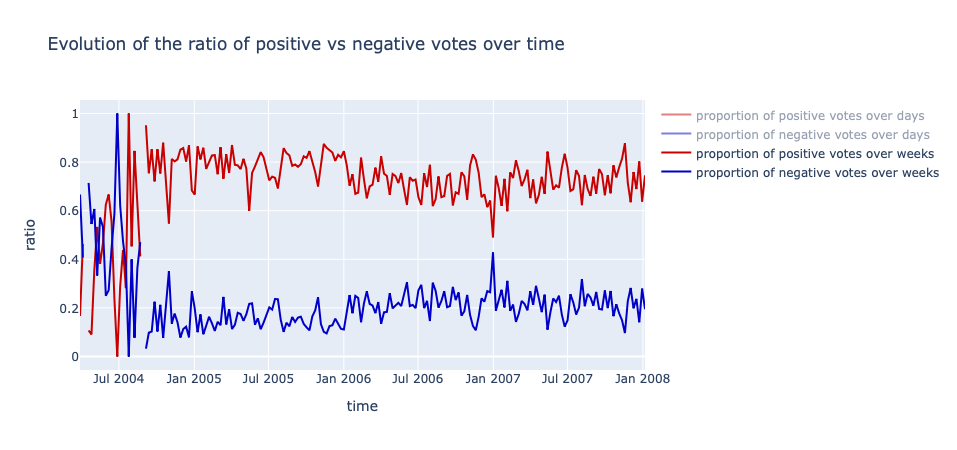

In [68]:
#creation of two dataframes containing only positive or negative votes respectively 
pos_votes=sign_time[sign_time['vote'].apply(lambda x: x==1)]
neg_votes=sign_time[sign_time['vote'].apply(lambda x: x==-1)]

#average over days, weeks, months and years
total_day=sign_time.groupby(pd.Grouper(key="vote_time", freq="D")).count()
sign_avg_day_pos = pos_votes.groupby(pd.Grouper(key="vote_time", freq="D")).count()/total_day
sign_avg_day_neg = neg_votes.groupby(pd.Grouper(key="vote_time", freq="D")).count()/total_day
#sign_avg_day['count'] = sign_time.groupby(pd.Grouper(key="vote_time", freq="D")).count()
total_week=sign_time.groupby(pd.Grouper(key="vote_time", freq="W")).count()
sign_avg_week_pos = pos_votes.groupby(pd.Grouper(key="vote_time", freq="W")).count()/total_week
sign_avg_week_neg = neg_votes.groupby(pd.Grouper(key="vote_time", freq="W")).count()/total_week
#sign_avg_week['count'] = sign_time.groupby(pd.Grouper(key="vote_time", freq="W")).count()
total_month=sign_time.groupby(pd.Grouper(key="vote_time", freq="M")).count()
sign_avg_month_pos = pos_votes.groupby(pd.Grouper(key="vote_time", freq="M")).count()/total_month
sign_avg_month_neg = neg_votes.groupby(pd.Grouper(key="vote_time", freq="M")).count()/total_month
#sign_avg_month['count'] = sign_time.groupby(pd.Grouper(key="vote_time", freq="M")).count()
total_year=sign_time.groupby(pd.Grouper(key="vote_time", freq="Y")).count()
sign_avg_year_pos = pos_votes.groupby(pd.Grouper(key="vote_time", freq="Y")).count()/total_year
sign_avg_year_neg = neg_votes.groupby(pd.Grouper(key="vote_time", freq="Y")).count()/total_year
#sign_avg_year['count'] = sign_time.groupby(pd.Grouper(key="vote_time", freq="Y")).count()

fig = go.Figure()

#traces for days
fig.add_trace(go.Scatter(
    x = sign_avg_day_pos.index,
    y = sign_avg_day_pos['vote'],
    mode ="lines",
    name ="proportion of positive votes over days",
    line =dict(color = 'rgb(200, 0, 0)'),
    visible = 'legendonly',
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'
))
fig.add_trace(go.Scatter(
    x = sign_avg_day_neg.index,
    y = sign_avg_day_neg['vote'],
    mode = "lines",
    name = "proportion of negative votes over days",
    line = dict(color='rgb(0, 0, 200)'),
    visible = 'legendonly',
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'
))

#traces for weeks
fig.add_trace(go.Scatter(
    x = sign_avg_week_pos.index,
    y = sign_avg_week_pos['vote'],
    mode = "lines",
    name = "proportion of positive votes over weeks",
    line = dict(color = 'rgb(200, 0, 0)'),
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'
))
fig.add_trace(go.Scatter(
    x = sign_avg_week_neg.index,
    y = sign_avg_week_neg['vote'],
    mode ="lines",
    name ="proportion of negative votes over weeks",
    line = dict(color = 'rgb(0, 0, 200)'),
    hovertemplate =
    '<br><b>Date </b>: %{x}'+
    '<br><b>Average vote </b>: %{y:.2f}'
))


fig.update_layout(
    title = "Evolution of the ratio of positive vs negative votes over time",
    xaxis_title = "time",
    yaxis_title = "ratio")
fig.show()

In [ ]:
#TODO analysis

In [ ]:
#https://docs.bokeh.org/en/latest/docs/gallery/stacked_area.html: idea for stacked pos and neg votes graph using bokeh (recommended by TA)

## Duplicates 
We want to investigate the vote distributions for repeated elections, meaning when the same candidate seeks adminship several times. For this to be possible, we have to chack that we indeed have enough duplicates in our dataset in order to conduct a meaningful analysis.

In [38]:
wikipedia.head()

,elec_outcome,elec_time,candidate_id,voter_id,vote,vote_time,nominator_id
0,1,2004-09-21 01:15:53,30,3,1,2004-09-14 16:26:00,32
1,1,2004-09-21 01:15:53,30,25,-1,2004-09-14 16:53:00,32
2,1,2004-09-21 01:15:53,30,4,1,2004-09-14 17:08:00,32
3,1,2004-09-21 01:15:53,30,5,1,2004-09-14 17:37:00,32
4,1,2004-09-21 01:15:53,30,6,1,2004-09-14 19:28:00,32


In [24]:
wikipedia.shape

(114029, 7)

In [40]:
duplicated = wikipedia[ wikipedia[['voter_id','candidate_id']].duplicated(keep=False) ] # keep=False to keep all duplicates
duplicated
# duplicate in this context = when a voter voted for the same candidate several time
# we have a lot of duplicates : ~7500

,elec_outcome,elec_time,candidate_id,voter_id,vote,vote_time,nominator_id
128,0,2005-07-05 00:11:04,8,72,1,2004-09-14 22:16:00,-1
135,0,2005-07-05 00:11:04,8,11,1,2004-09-15 04:30:00,-1
136,0,2005-07-05 00:11:04,8,75,1,2004-09-15 04:35:00,-1
142,0,2005-07-05 00:11:04,8,78,-1,2004-09-15 19:25:00,-1
143,0,2005-07-05 00:11:04,8,79,-1,2004-09-15 22:18:00,-1
...,...,...,...,...,...,...,...
113835,0,2008-01-06 02:04:59,7924,5998,1,2008-01-05 02:29:00,-1
113842,0,2008-01-06 02:04:59,7924,6072,1,2008-01-05 19:12:00,-1
113849,0,2008-01-06 02:04:59,7924,6596,0,2008-01-05 23:55:00,-1
114016,0,2008-01-06 02:18:28,6924,3642,1,2008-01-06 02:10:00,-1


In [41]:
# But on average, how many time did a voter voted for the same candidate?

voter_candidate = wikipedia[['voter_id','candidate_id']]
# voter_candidate = voter_candidate[voter_candidate.duplicated()]
count_duplicated = voter_candidate.groupby(voter_candidate.columns.tolist(),as_index=False).size()
count_duplicated

voter_id  candidate_id
10        105             1
          130             1
          132             1
          135             1
          147             1
                         ..
998       971             1
999       1014            1
          432             1
          789             1
          959             1
Length: 110076, dtype: int64

In [42]:
count_duplicated['size'].describe()

# Interpretation
# Most of the voter voted a single time for a given candidate 
# but some voted up to 5 times for the same candidate

KeyError: 'size'

In [43]:
# Histo of the duplicates (1= no duplication)
plt.hist(count_duplicated['size']);

KeyError: 'size'

In [ ]:
# Histo of the duplicates 

count_duplicated_tmp = count_duplicated[count_duplicated['size']>1]

plt.hist(count_duplicated_tmp['size']);

# Interpretation:
# More than 3000 people voted at least 2 times for the same candidate